<a href="https://colab.research.google.com/github/muajnstu/Fake-News-Detection-using-Deep-Learning-LSTM-Approach/blob/main/fake_News_classification_using_TF_IDF_Vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Fake vs True News Classification Using TF-IDF vectorizer: </b>

* In the last few years, due to the widespread usage of online social networks, fake news spreading at an alarming rate for various commercial and political purposes which is a matter of concern as it has numerous psychological effects on offline society

*  Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

<b> "By 2022, most people in mature economies will consume more false information than true information." </b>

* We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

* In this case we will use TF-IDF vectorizer to create a sparse matrix to train the model

**Dataset**

* The data used in this case study is the **ISOT Fake News Dataset**. The dataset contains two types of articles fake and real news.
* The dataset consists of two CSV files. The first file named True.csv contains more than 12,600 articles from Reuters.com. The second file named Fake.csv contains more than 12,600 articles from different fake news outlet resources

# Load the datasets & concat both

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_fake=pd.read_csv('https://raw.githubusercontent.com/muajnstu/Fake-News-Detection-using-Deep-Learning-LSTM-Approach/main/Fake.csv')

In [3]:
df_fake=df_fake.drop(['subject','date'], axis=1)

df_fake['label']='Fake'

In [4]:
df_true = pd.read_csv('https://raw.githubusercontent.com/muajnstu/Fake-News-Detection-using-Deep-Learning-LSTM-Approach/main/True.csv')
df_true=df_true.drop(['subject','date'],axis=1)
df_true['label']='TRUE'

df= pd.concat([df_true, df_fake], ignore_index=True)

In [5]:
#shuffling the dataset & create final dataset
df=df.reindex(np.random.permutation(df.index))
df

,title,text,label
8257,No. 2 House Democrat opposes temporary gov't s...,WASHINGTON (Reuters) - U.S. Representative Ste...,TRUE
2443,Top Democrat says he hopes U.S. Senate at turn...,WASHINGTON (Reuters) - U.S. Senate Democratic ...,TRUE
27734,Melania Trump: Reporter ‘Provoked’ Anti-Semit...,Donald Trump s wife Melania has made some shoc...,Fake
24713,Anthony Bourdain Reveals The ‘ONE Good Thing’...,While Donald Trump is currently freaking out b...,Fake
18542,Air strike kills seven Hezbollah fighters in S...,BEIRUT (Reuters) - An air strike carried out b...,TRUE
...,...,...,...
6380,Tillerson says China should be barred from Sou...,WASHINGTON (Reuters) - U.S. President-elect Do...,TRUE
31738,SNOPES IMPLODES! Liberal “Fact-Checker” Turns ...,Where s George Soros when his top fact check...,Fake
36788,BOOM! Trump Shows How A Good Business Mind Nev...,No wonder America loves this guy so much. It s...,Fake
10704,Judiciary committee senators won't consider Ob...,WASHINGTON (Reuters) - Republicans on the U.S....,TRUE


# Preprocessing

In [6]:
import re
# function for extracting desired text using regex
def extract_txt(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
    if regex:
        return regex.group(0)
    return text
#applying regex function to retain only relevant text
df['text_processed'] = df['text'].apply(extract_txt)

In [7]:
# drop extra column
df = df.drop(['text'],axis=1)
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df

,title,label,text_processed
8257,No. 2 House Democrat opposes temporary gov't s...,0,"U.S. Representative Steny Hoyer, the No. 2 Hou..."
2443,Top Democrat says he hopes U.S. Senate at turn...,0,U.S. Senate Democratic leader Chuck Schumer sa...
27734,Melania Trump: Reporter ‘Provoked’ Anti-Semit...,1,Donald Trump s wife Melania has made some shoc...
24713,Anthony Bourdain Reveals The ‘ONE Good Thing’...,1,While Donald Trump is currently freaking out b...
18542,Air strike kills seven Hezbollah fighters in S...,0,An air strike carried out by an unidentified w...
...,...,...,...
6380,Tillerson says China should be barred from Sou...,0,U.S. President-elect Donald Trump’s nominee fo...
31738,SNOPES IMPLODES! Liberal “Fact-Checker” Turns ...,1,Where s George Soros when his top fact check...
36788,BOOM! Trump Shows How A Good Business Mind Nev...,1,No wonder America loves this guy so much. It s...
10704,Judiciary committee senators won't consider Ob...,0,Republicans on the U.S. Senate Judiciary Commi...


In [8]:
#combining text_processed and title for creating full news article with headline
df['final_news'] = df['title'] + " " + df['text_processed']

# now we can delete extra columns
cols_del =['title','text_processed']
df = df.drop(cols_del,axis=1)

df.head()

,label,final_news
8257,0,No. 2 House Democrat opposes temporary gov't s...
2443,0,Top Democrat says he hopes U.S. Senate at turn...
27734,1,Melania Trump: Reporter ‘Provoked’ Anti-Semit...
24713,1,Anthony Bourdain Reveals The ‘ONE Good Thing’...
18542,0,Air strike kills seven Hezbollah fighters in S...


In [9]:
df.reset_index(inplace=True)

In [11]:
df

,index,label,subject,date,final_news
0,39774,1,left-news,"Jul 9, 2017",CHILLING PHOTO Captures FEMALE SUICIDE BOMBER ...
1,34276,1,politics,"Oct 2, 2016",WOW! BLACK TRUMP SUPPORTER’S Epic Takedown Of ...
2,30650,1,politics,"Dec 10, 2017",WATCH: SEAN HANNITY Offers To Step In After He...
3,38809,1,Government News,"Apr 26, 2015",CRAZY VIDEO! MAYOR OF BALTIMORE: WE GAVE RIOTE...
4,5667,0,NaN,NaN,U.S. conference on Libya postponed over Trump ...
...,...,...,...,...,...
44893,19726,0,NaN,NaN,Britain says Syrian reconstruction only after ...
44894,21334,0,NaN,NaN,Vatican prepared in case of Barcelona-style at...
44895,16768,0,NaN,NaN,Cambodian PM says main opposition party will b...
44896,11098,0,NaN,NaN,Falwell Jr. endorses Trump for U.S. president:...


In [10]:
df.drop(['index'],axis=1,inplace= True)

In [11]:
df

,label,final_news
0,0,No. 2 House Democrat opposes temporary gov't s...
1,0,Top Democrat says he hopes U.S. Senate at turn...
2,1,Melania Trump: Reporter ‘Provoked’ Anti-Semit...
3,1,Anthony Bourdain Reveals The ‘ONE Good Thing’...
4,0,Air strike kills seven Hezbollah fighters in S...
...,...,...
44893,0,Tillerson says China should be barred from Sou...
44894,1,SNOPES IMPLODES! Liberal “Fact-Checker” Turns ...
44895,1,BOOM! Trump Shows How A Good Business Mind Nev...
44896,0,Judiciary committee senators won't consider Ob...


In [12]:

def wordopt (text):
  # convert into lower case
  text=text.lower()
  # remove URLs
  text=re.sub(r'https?://\S+|www\.\S+','',text)
  #Remove HTML Tags
  text=re.sub(r'<.*?',',',text)
  #Remove Punctuation
  text = re.sub(r'[^\w\s]', '', text)
  #Remove igits
  text = re.sub(r'\d', '', text)
  #Remove newline characters
  text = re.sub(r'\n', ' ', text)
  return text


In [13]:
df['final_news']= df['final_news'].apply(wordopt)

In [15]:
df

,label,subject,date,final_news
0,1,left-news,"Jul 9, 2017",chilling photo captures female suicide bomber ...
1,1,politics,"Oct 2, 2016",wow black trump supporters epic takedown of me...
2,1,politics,"Dec 10, 2017",watch sean hannity offers to step in after he ...
3,1,Government News,"Apr 26, 2015",crazy video mayor of baltimore we gave rioters...
4,0,NaN,NaN,us conference on libya postponed over trump tr...
...,...,...,...,...
44893,0,NaN,NaN,britain says syrian reconstruction only after ...
44894,0,NaN,NaN,vatican prepared in case of barcelonastyle att...
44895,0,NaN,NaN,cambodian pm says main opposition party will b...
44896,0,NaN,NaN,falwell jr endorses trump for us president cam...


# Split the dataset

In [14]:
X=df['final_news']
y=df['label']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(31428,)

In [ ]:
X_test.shape

(13470,)

# Feature Extraction

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()

In [17]:
xv_train = vector.fit_transform(X_train)
xv_test = vector.transform(X_test)

In [ ]:
xv_train

<31428x177586 sparse matrix of type '<class 'numpy.float64'>'
	with 6555038 stored elements in Compressed Sparse Row format>

In [ ]:
xv_test

<13470x111537 sparse matrix of type '<class 'numpy.float64'>'
	with 2809301 stored elements in Compressed Sparse Row format>

# Train the model and make predictions

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(xv_train,y_train)

LogisticRegression()

In [19]:
y_prd=model.predict(xv_test)

In [20]:
model.score(xv_test,y_test)

0.9838158871566444

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6483
           1       0.99      0.98      0.98      6987

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
#2. fit with all_train_embeddings and y_train
clf.fit(xv_train, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(xv_test)

#4. print the classfication report
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6483
           1       0.99      0.98      0.98      6987

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
#2. fit with all_train_embeddings and y_train
clf.fit(xv_train, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(xv_test)

#4. print the classfication report
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6483
           1       0.99      0.98      0.98      6987

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



In [24]:
from sklearn.tree import DecisionTreeClassifier

cls= DecisionTreeClassifier(random_state=42)
#2. fit with all_train_embeddings and y_train
clf.fit(xv_train, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(xv_test)

#4. print the classfication report
print(classification_report(y_test, y_prd))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6483
           1       0.99      0.98      0.98      6987

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



# Confusion Matrix

Text(95.72222222222221, 0.5, 'Truth')

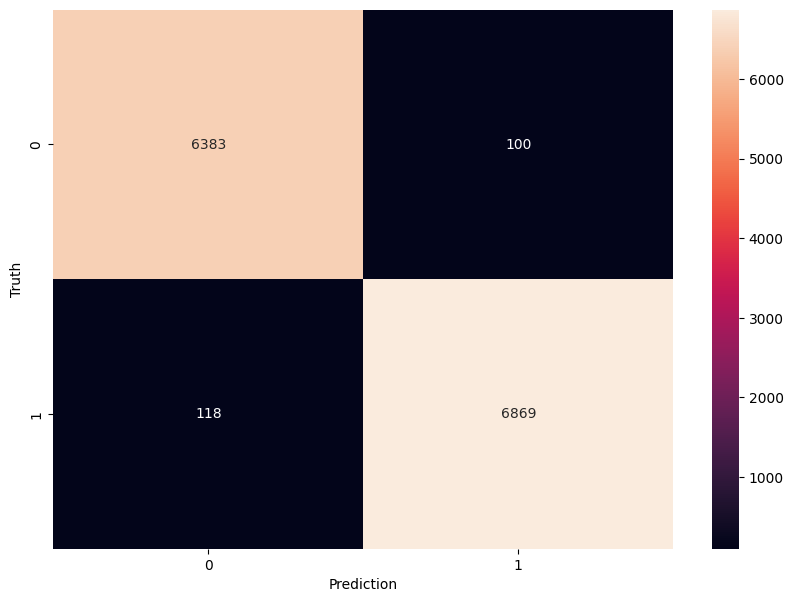

In [25]:
#finally print the confusion matrix for the best model (GradientBoostingClassifier)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prd)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')